<a href="https://colab.research.google.com/github/ulijese/arg_prog4/blob/main/grupo__ojeda_j.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Módulo 1**


##**1.- Importo librerías y levanto el archivo**
Levanto el archivo csv desde un url (https://raw.githubusercontent.com/ulijese/arg_prog4/main/serie-tiempo-turismo-interno-trimestral.csv) a un dataframe df y lo muestro.

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

url='https://raw.githubusercontent.com/ulijese/arg_prog4/main/serie-tiempo-turismo-interno-trimestral.csv'
df = pd.read_csv(url)
df.head()


,indice_tiempo,destino_caba,destino_cordoba,destino_cuyo,destino_litoral,destino_norte,destino_patagonia,destino_pba_resto,destino_pba_partidos_del_gba,edad_menos_de_14_anos,...,gasto_medio_cuyo,gasto_medio_patagonia,estadia_media_caba,estadia_media_pba_resto,estadia_media_pba_partidos_del_gba,estadia_media_cordoba,estadia_media_litoral,estadia_media_norte,estadia_media_cuyo,estadia_media_patagonia
0,2012-01-01,189534,1918573,838633,2049231,1331848,937769,5075668,132610,2700561,...,988.38524,1260.92633,5.57,8.41,7.18,7.26,5.05,8.01,7.05,9.05
1,2012-04-01,275725,743680,362199,1502444,813177,263315,1402536,61388,957231,...,901.52479,1254.95557,4.51,3.44,4.11,6.12,3.30,4.36,3.77,5.33
2,2012-07-01,360368,596352,475912,1107905,896399,444811,1501835,101282,1221911,...,1007.79172,1542.05071,6.21,3.09,6.31,4.33,4.49,5.38,4.37,5.89
3,2012-10-01,189002,1007641,512563,1018847,979211,379846,1762021,98255,1172970,...,742.53016,1668.32983,5.66,3.21,4.02,3.79,3.44,3.72,3.31,6.75
4,2013-01-01,165441,1893574,824501,1715615,1161820,707719,4632993,167877,2604040,...,1089.95163,1899.84317,5.77,8.71,7.80,7.23,6.84,9.88,7.70,8.28


##**2.- Información acerca del dataframe**
La propiedad *`shape`* me devolverá la dimensión del dataframe en ***instancias*** y ***feactures*** (***row*** y ***columns***, filas y columnas); la propiedad *`dtypes`* me devolverá el tipo de variable de cada columna.  Con el método *`df.info()`* puedo aunar esta información.

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 67 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   indice_tiempo                                  44 non-null     object 
 1   destino_caba                                   44 non-null     int64  
 2   destino_cordoba                                44 non-null     int64  
 3   destino_cuyo                                   44 non-null     int64  
 4   destino_litoral                                44 non-null     int64  
 5   destino_norte                                  44 non-null     int64  
 6   destino_patagonia                              44 non-null     int64  
 7   destino_pba_resto                              44 non-null     int64  
 8   destino_pba_partidos_del_gba                   44 non-null     int64  
 9   edad_menos_de_14_anos                          44 non-nu

En resumen: 67 columnas, 44 filas.
Se observa que las columnas '`edad_ns_nr`' y '`alojamiento_camping`' contienen datos nulos. Se puede comprobar llamando a las columnas (sus dimensiones permiten ver a simple vista  la totalidad de sus instancias), pero si el caso fuera que por sus dimensiones no fuera posible observarlas directamente, usando el método *`isnull()`* y el método *`sum()`* podríamos ver la cantidad de valores nulos:

In [343]:
# tail() nos permite ver las últimas instancias. tail(n) nos dejará ver las últimas n instancias
df['alojamiento_camping'].tail(15)

29     41345.0
30    145785.0
31    255252.0
32    353241.0
33         NaN
34         NaN
35      9747.0
36    165778.0
37     38799.0
38    184052.0
39    209669.0
40    482299.0
41    113563.0
42     87430.0
43    181465.0
Name: alojamiento_camping, dtype: float64

In [344]:
df['alojamiento_camping'].isnull().sum()

2

In [345]:
df['edad_ns_nr']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
30        NaN
31    35070.0
32        NaN
33        NaN
34        NaN
35        NaN
36        NaN
37        NaN
38        NaN
39        NaN
40        NaN
41        NaN
42        NaN
43        NaN
Name: edad_ns_nr, dtype: float64

In [346]:
df['edad_ns_nr'].isnull().sum()

43

##**3.- Tratamiento de datos faltantes y tipos de variables**


###**Valores nulos: Columna 'alojamiento_camping'**
Buscamos una estrategia para salvar los valores nulos. Primero para la columna `'alojamiento camping'`, que tiene 2. Podemos reemplazar los valores NaN con la moda, o con el valor de la mediana. Probamos `mode()`:

In [347]:
df['alojamiento_camping'].mode()

0        9747.0
1       37106.0
2       38799.0
3       41345.0
4       61366.0
5       76337.0
6       80369.0
7       87430.0
8      105073.0
9      107885.0
10     113563.0
11     127274.0
12     128472.0
13     139216.0
14     139490.0
15     145785.0
16     157369.0
17     164894.0
18     165778.0
19     173138.0
20     180090.0
21     181465.0
22     184052.0
23     205272.0
24     209669.0
25     225442.0
26     230254.0
27     255252.0
28     302071.0
29     326232.0
30     353241.0
31     364143.0
32     398480.0
33     482299.0
34     516508.0
35     570121.0
36     674168.0
37     679519.0
38     761752.0
39     940048.0
40     999037.0
41    1101861.0
Name: alojamiento_camping, dtype: float64

Observamos que hay muchos valores de moda, ya que la mayoria de las instancias de la columna son diferentes. Como estrategia reemplazaremos los valores NaN por la mediana de los datos de la columna. El valor de la misma lo obtendremos con el método *`median()`* y con el método *`fillna()`* haremos el reemplazo:

In [348]:
# Tomo el valor de la mediana
df['alojamiento_camping'].median()

180777.5

In [349]:
# Reemplazo mediante fillna()
df['alojamiento_camping'] = df['alojamiento_camping'].fillna(df['alojamiento_camping'].median())
# Verificación de los nulos resultantes
df['alojamiento_camping'].isnull().sum()

0

###**Valores nulos: Columna '`edad_ns_nr`'**
En el caso de esta columna, todas sus instancias salvo 1 son valores NaN. En un principio pensé eliminarla, pero luego de observar mejor el dataset decidí comparar la suma de todas las columnas que reflejan la edad de los turistas, excluyendo `'edad_ns_nr'`, vs. la suma de las columnas `'sexo_mujer`' y `'sexo_varon'`, que refleja el total de personas relevadas, independientemente de su edad, que debería ser igual a la suma de las columnas de las edades. Luego comparo el resultado. Las variables que contienen las sumatorias son del tipo ***serie***. Para compararlas uso la función *`compare()`*. Esta función devuelve las filas cuyos valores son diferentes, denominando *`self`* a la serie original y *`other`* a la serie con la que se compara. Modifico el nombre de las feactures que me devuelve `compare()`: *'`total_edades`'* en lugar de *`'self'`* y *'`total_sexo`'* en lugar de *'`other`*'.

In [350]:
sum_edades = df['edad_menos_de_14_anos'] +	df['edad_14_a_29_anos'] + df['edad_30_a_44_anos'] + df['edad_45_a_59_anos']	+ df['edad_60_anos_o_mas']
sum_sexos = df['sexo_mujer'] + df['sexo_varon']
resumen = sum_edades.compare(sum_sexos, result_names=('total_edades', 'total_sexo'))
resumen


,total_edades,total_sexo
31,6385341.0,6420411.0


In [351]:
diferencia = resumen['total_sexo'] - resumen['total_edades']
print(float(diferencia))

35070.0


La fila 31 la única que tiene valor en `'edad_ns_nr'`; su valor es:

In [352]:
df['edad_ns_nr'].sum()

35070.0

¿Qué significan los resultados anteriores? La variable ***resumen*** almacena la o las instancias cuyos valores difieren entre sí; en este caso la fila 31. En la operación siguiente, la variable **diferencia** almacena la resta entre ambos totales, que es de 35070.
En base a esto se concluye entonces que:
*   En las filas donde la función `compare()` no devolvió valores la suma de todas las edades relevadas es igual al total de toda la población de turistas.
*   La fila 31 indica que hay una diferencia entre la sumatoria de turistas por sexo y la sumatoria de lo relevado en las feactures de edad. La diferencia es de 35070.
* En los casos sin diferencia, `'edad_ns_nr'` **debe ser 0**.
* La fila 31 de 'edad_ns_nr' tiene un valor de 35070, que es el valor de la diferencia.

Por lo tanto es correcto decir que en todos los casos:



>```
total_sexo = total_edades + edad_ns_nr
```

Y podemos determinar que es segura la estrategia de llenar los valores NaN de `edad_ns_nr` con 0.


In [353]:
# Reemplazo mediante fillna() con cero
df['edad_ns_nr'] = df['edad_ns_nr'].fillna(0)
# Verificación de los nulos resultantes
df['edad_ns_nr'].isnull().sum()

0

In [354]:
df['edad_ns_nr'].mean()

797.0454545454545

In [355]:
df['edad_ns_nr'].mode()

0    0.0
Name: edad_ns_nr, dtype: float64

In [356]:
df['edad_ns_nr'].median()

0.0

###**Cambio del tipo de variable en `'indice_tiempo'`**
'indice_tiempo' indica la fecha del comienzo de la toma de datos que, de acuerdo a lo que se puede observar, es trimestral. El tipo de variable debería ser ***datetime***. Sin embargo el tipo de variable que devuelve df.info() no refleja eso. Veamos:

In [357]:
df['indice_tiempo'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 44 entries, 0 to 43
Series name: indice_tiempo
Non-Null Count  Dtype 
--------------  ----- 
44 non-null     object
dtypes: object(1)
memory usage: 480.0+ bytes


Lo corregimos, primero dándole al string un formato del tipo día-mes-año, y luego a convirtiéndolo al tipo **datetime**:

In [358]:
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])
df['indice_tiempo'] = df['indice_tiempo'].dt.strftime('%d-%m-%Y')
df['indice_tiempo'] = pd.to_datetime(df['indice_tiempo'])
df['indice_tiempo'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 44 entries, 0 to 43
Series name: indice_tiempo
Non-Null Count  Dtype         
--------------  -----         
44 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 480.0 bytes


#**Módulo 2 Análisis descriptivo**
Distinguimos tres tipos de análisis, según el número de variables a analizar conjuntamente:


*   Univariado.
*   Bivariado.
*   Multivariado.

El univariado es analizar cada una de las variables por separado. A esto también se llama análisis Descriptivo.



##**4.- Medidas de tendencia central y medidas de variabilidad**
El método `describe()` nos retorna información acerca de las variable cuantitativas que conforman mi dataframe. Media, desviación estándar, valores mínimo y máximo, y cuartiles forman parte de la información provista por el método.

In [359]:
df.describe()

,destino_caba,destino_cordoba,destino_cuyo,destino_litoral,destino_norte,destino_patagonia,destino_pba_resto,destino_pba_partidos_del_gba,edad_menos_de_14_anos,edad_14_a_29_anos,...,gasto_medio_cuyo,gasto_medio_patagonia,estadia_media_caba,estadia_media_pba_resto,estadia_media_pba_partidos_del_gba,estadia_media_cordoba,estadia_media_litoral,estadia_media_norte,estadia_media_cuyo,estadia_media_patagonia
count,44.000000,4.400000e+01,44.000000,4.400000e+01,4.400000e+01,4.400000e+01,4.400000e+01,44.000000,4.400000e+01,4.400000e+01,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,207918.772727,8.744825e+05,487141.363636,1.165706e+06,7.927035e+05,5.086636e+05,2.350972e+06,138596.613636,1.368493e+06,1.395341e+06,...,5130.241182,10427.109270,5.545909,4.751364,4.858409,5.712045,4.449318,5.432727,4.847955,7.079773
std,96073.476325,4.449518e+05,212245.283481,4.245956e+05,2.877112e+05,2.722269e+05,1.482977e+06,141518.352721,7.187247e+05,7.053771e+05,...,6302.299165,13295.355001,1.510047,2.075422,2.521562,6.061219,1.336563,1.581439,1.581873,2.464484
min,14280.000000,2.382700e+04,11365.000000,2.383200e+04,6.543200e+04,3.349000e+03,2.991000e+04,882.000000,9.193000e+03,4.176200e+04,...,742.530160,1254.955570,1.990000,1.770000,2.000000,2.370000,2.240000,2.000000,1.960000,2.300000
25%,169757.750000,6.298292e+05,352505.500000,9.183310e+05,6.775342e+05,3.314780e+05,1.447176e+06,78282.000000,9.669720e+05,1.084210e+06,...,1745.687958,3347.683315,4.665000,3.287500,2.880000,3.860000,3.630000,4.355000,3.817500,5.855000
50%,199951.500000,8.025090e+05,476293.000000,1.154091e+06,7.875655e+05,4.618380e+05,1.805022e+06,99768.500000,1.245126e+06,1.287392e+06,...,2779.706405,5108.782745,5.530000,3.855000,3.995000,4.100000,4.225000,5.095000,4.405000,6.590000
75%,239715.500000,1.050980e+06,636542.250000,1.450042e+06,9.872355e+05,6.413505e+05,2.856014e+06,165071.250000,1.491525e+06,1.605310e+06,...,5468.967575,9938.794187,6.487500,6.992500,6.077500,6.122500,5.055000,6.250000,6.277500,8.010000
max,403423.000000,1.918573e+06,877251.000000,2.049231e+06,1.331848e+06,1.380521e+06,5.879239e+06,947119.000000,2.896810e+06,3.143845e+06,...,27359.619980,55169.558030,9.910000,8.880000,12.280000,43.700000,8.540000,9.880000,8.090000,16.740000


###**Medidas de tendencia central**
Son las medidas que  permiten entender la zonacentral en un conjunto de datos. Mediante ***Pandas*** podemos extraer la media, mediana y moda de una feacture determinada. Para el estudio se utilizará la variable `'alojamiento_camping'` y se redondeará a dos decimales:

In [360]:
df['alojamiento_camping'].describe()

count    4.400000e+01
mean     2.864311e+05
std      2.687882e+05
min      9.747000e+03
25%      1.238462e+05
50%      1.807775e+05
75%      3.559665e+05
max      1.101861e+06
Name: alojamiento_camping, dtype: float64

In [361]:
#Media:
df['alojamiento_camping'].mean().round(2)

286431.07

In [362]:
#Mediana
df['alojamiento_camping'].median().round(2)

180777.5

In [363]:
#Moda
df['alojamiento_camping'].mode().round(2)

0    180777.5
Name: alojamiento_camping, dtype: float64

###**Medidas de variabilidad o dispersión**
Podemos buscar el rango, la varianza, la desviación estandar, etc. También existen medidas robustas para datos atípicos como el
rango intercuartílico (IQR)

In [364]:
# Rango, la diferencia entre el máximo y el mínimo
rango = df['alojamiento_camping'].max() - df['alojamiento_camping'].min()
rango

1092114.0

In [365]:
# Varianza:
var = df['alojamiento_camping'].var(ddof=0).round(2)
var

70605134232.51

In [366]:
#desviación estandar:
aloj_std = df['alojamiento_camping'].std().round(2)
aloj_std

268788.23

In [367]:
#Calculo de covarianza entre sexo_varon y alojamiento_camping
np.cov([df['sexo_varon'], df['alojamiento_camping']])

array([[2.00618506e+12, 2.99881133e+11],
       [2.99881133e+11, 7.22471141e+10]])

In [368]:
# Calculamos la matriz de correlacion entre sexo_varon y alojamiento_camping:
np.corrcoef(df['sexo_varon'], df['alojamiento_camping'])

array([[1.        , 0.78768649],
       [0.78768649, 1.        ]])

In [369]:
# calculamos el CV de origen_caba:

CV = (aloj_std/df['alojamiento_camping'].mean())*100
print('CV Alojamiento camping:', round(CV,2),'%')

CV Alojamiento camping: 93.84 %


###**Medidas de tendencia central y variabilidad usando** ***scipy***

In [370]:
import scipy
var = df['alojamiento_camping']
scipy.stats.describe(var)

DescribeResult(nobs=44, minmax=(9747.0, 1101861.0), mean=286431.0681818182, variance=72247114098.37898, skewness=1.577612053496635, kurtosis=1.6645593905752136)

In [371]:
scipy.stats.gmean(var) # Media geométrica

191257.07559859435

In [372]:
scipy.stats.hmean(var) # Media armónica

110326.41525422168

In [373]:
scipy.stats.trim_mean(var,0.1) # Media recortada (Proporción removida en cada cola 10%)

240924.22222222222

In [374]:
scipy.stats.mode(var) # moda Age

ModeResult(mode=array([180777.5]), count=array([2]))

In [375]:
scipy.stats.variation(var) # Calcula el coeficiente de variacion

0.9276796266977709

In [376]:
scipy.stats.iqr(var) # Calcular el IQR

232120.25

In [377]:
scipy.stats.sem(var) # Calcular el Error estandar

40521.35074096432

###**Medidas de asimetría y kurtosis**

Utilizamos para este punto **`'estadia_media_caba'`**.

In [378]:
scipy.stats.describe(df['estadia_media_caba']) # método describe() de la librería scipy

DescribeResult(nobs=44, minmax=(1.99, 9.91), mean=5.545909090909091, variance=2.2802433403805495, skewness=0.05260725118735177, kurtosis=0.7968148661000969)

In [379]:
np.median(df['estadia_media_caba']) # tomamos la media

5.53

In [380]:
scipy.stats.tstd(df['estadia_media_caba']) # tomamos la desviación estándar

1.5100474629562308

In [381]:
scipy.stats.mode(df['estadia_media_caba']) # tomamos el modo

ModeResult(mode=array([5.53]), count=array([2]))

In [382]:
scipy.stats.skew(df['estadia_media_caba']) # Calcular el CA Asimetría (Sesgo)

0.05260725118735177

In [383]:
scipy.stats.kurtosis(df['estadia_media_caba']) # Calcular el CA_p  Kurtosis (Apuntamiento o achatamiento)

0.7968148661000969


La **asimetría** nos indica si los valores que equidistan a la media son iguales. En este caso, el valor de ***Skewness*** (sesgo) de 0.052 nos indica que está levemente sesgada positivamente. Una kurtosis mayor que cero indica que la distribución es leptocúrtica, tiene forma de pico, mientras que una distribución normal tendría un valor 0.
En este caso, el valor de kurtosis es de 0.79.

En una **distribución normal** media, mediana y moda son coincidentes. Para este caso de estudio estas medidas estuvieron muy cercanas entre sí:


> Media: 5.545909

> Mediana: 5.53

>Moda: 5.53








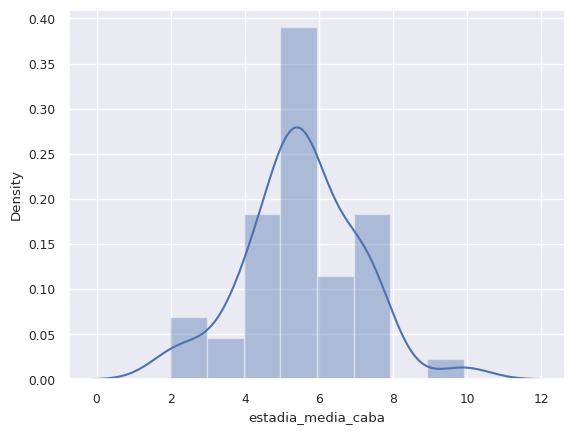

In [384]:
# Importamos la librería Seaborn
import seaborn as sns
# sns.set(font_scale=0.8)
# Graficamos la distribución de la variable estadia_media_caba:
sns.distplot(df['estadia_media_caba'], kde=True) #False
plt.show()

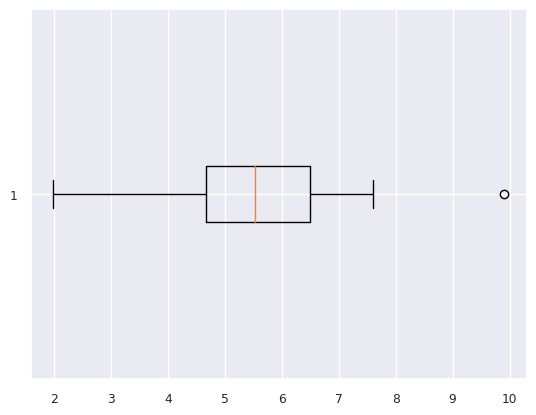

In [385]:
#boxplot
plt.boxplot(df['estadia_media_caba'], vert=False)
plt.show()

##**5.-Visualizaciones**

###**Scatterplot**

Lo utilizo para visualizar la relación entre dos variables; en este caso la cantidad de viajantes con origen en Capital Federal vs la cantidad de personas que viajaron a la región Cuyo.

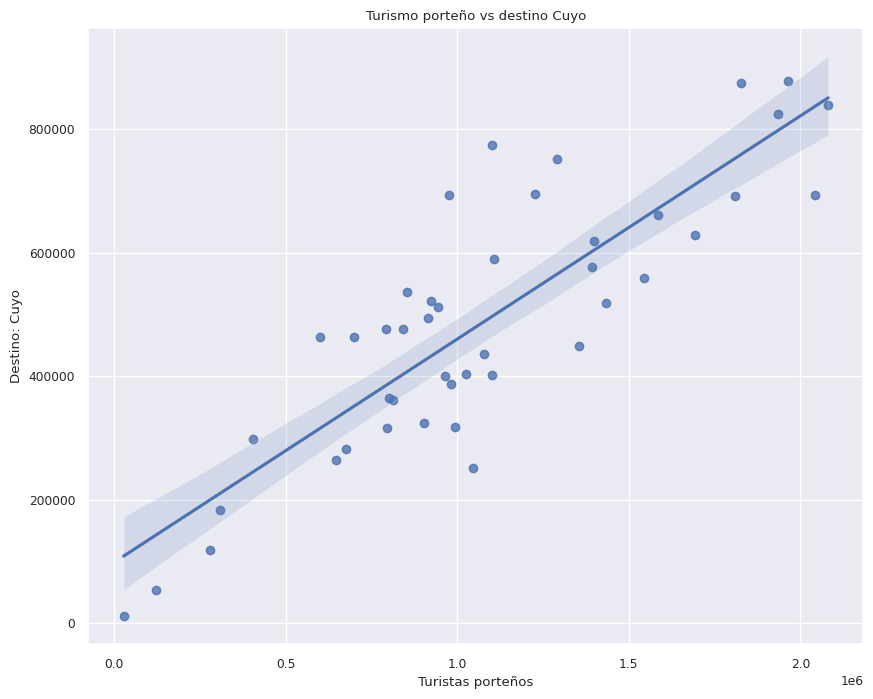

In [386]:
# Scatterplot:
# tamaño de figura
fig = plt.figure(figsize=(10, 8))

ax = sns.regplot(x="origen_caba", y="destino_cuyo", data=df)
ax.set(xlabel='Turistas porteños', ylabel='Destino: Cuyo')
plt.title('Turismo porteño vs destino Cuyo')
plt.show()

###**Barplot**

Utilizamos un barplot para graficar datos categóricos, donde cada dato estará representado por una barra cuya altura será proporcional al valor que representa. En el caso del ejemplo se grafican cuatro trimestres y el total de viajantes a Zona patagonia en cada uno de ellos.

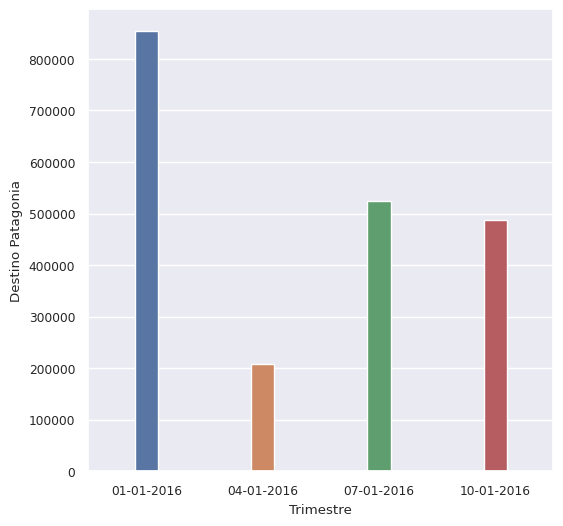

In [387]:
# filtro por trimestre usando 'indice_tiempo'
df_grpd = df.loc[df['indice_tiempo'].isin(['01-01-2016', '01-04-2016', '01-07-2016', '01-10-2016'])]

# Grafico
fig = plt.figure(figsize=(6, 6))
grafico = sns.barplot(x=pd.to_datetime(df_grpd['indice_tiempo'], format='%d-%m-%Y').dt.strftime('%d-%m-%Y'), y='destino_patagonia', data=df_grpd, width=0.2)
grafico.set(xlabel='Trimestre', ylabel='Destino Patagonia')
plt.show()

###**Histograma**

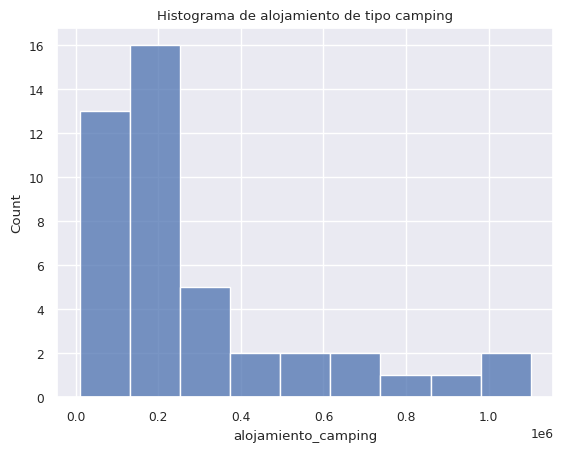

In [388]:
# Graficamos el histograma de la variable alojamiento_camping:
sns.histplot(data=df,x='alojamiento_camping')
plt.title('Histograma de alojamiento de tipo camping')
plt.show()

###**Distribución**

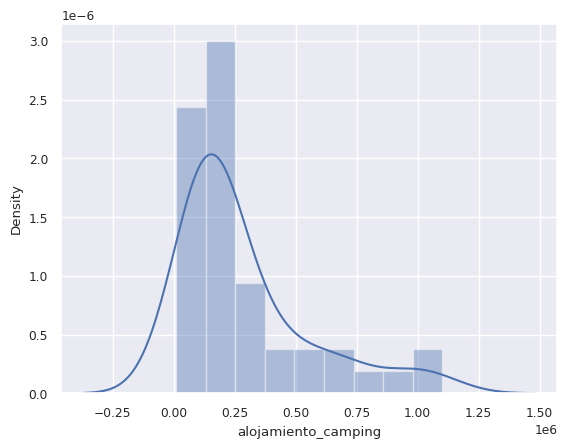

In [389]:
# Graficamos la distribución de la variable alojamiento_camping:
sns.distplot(df['alojamiento_camping'], kde=True) #False
plt.show()

In [390]:
scipy.stats.skew(df['alojamiento_camping']) # Calcular el CA Asimetría (Sesgo)

1.577612053496635

In [391]:
scipy.stats.kurtosis(df['alojamiento_camping']) # Calcular el CA_p  Kurtosis (Apuntamiento o achatamiento)

1.6645593905752136

Viendo el gráfico de la variable **`'alojamiento_camping'`**, podemos decir que tiene una asimetría positiva y una curtosis mayor que cero, es decir, una distribución es leptocúrtica, con pico.

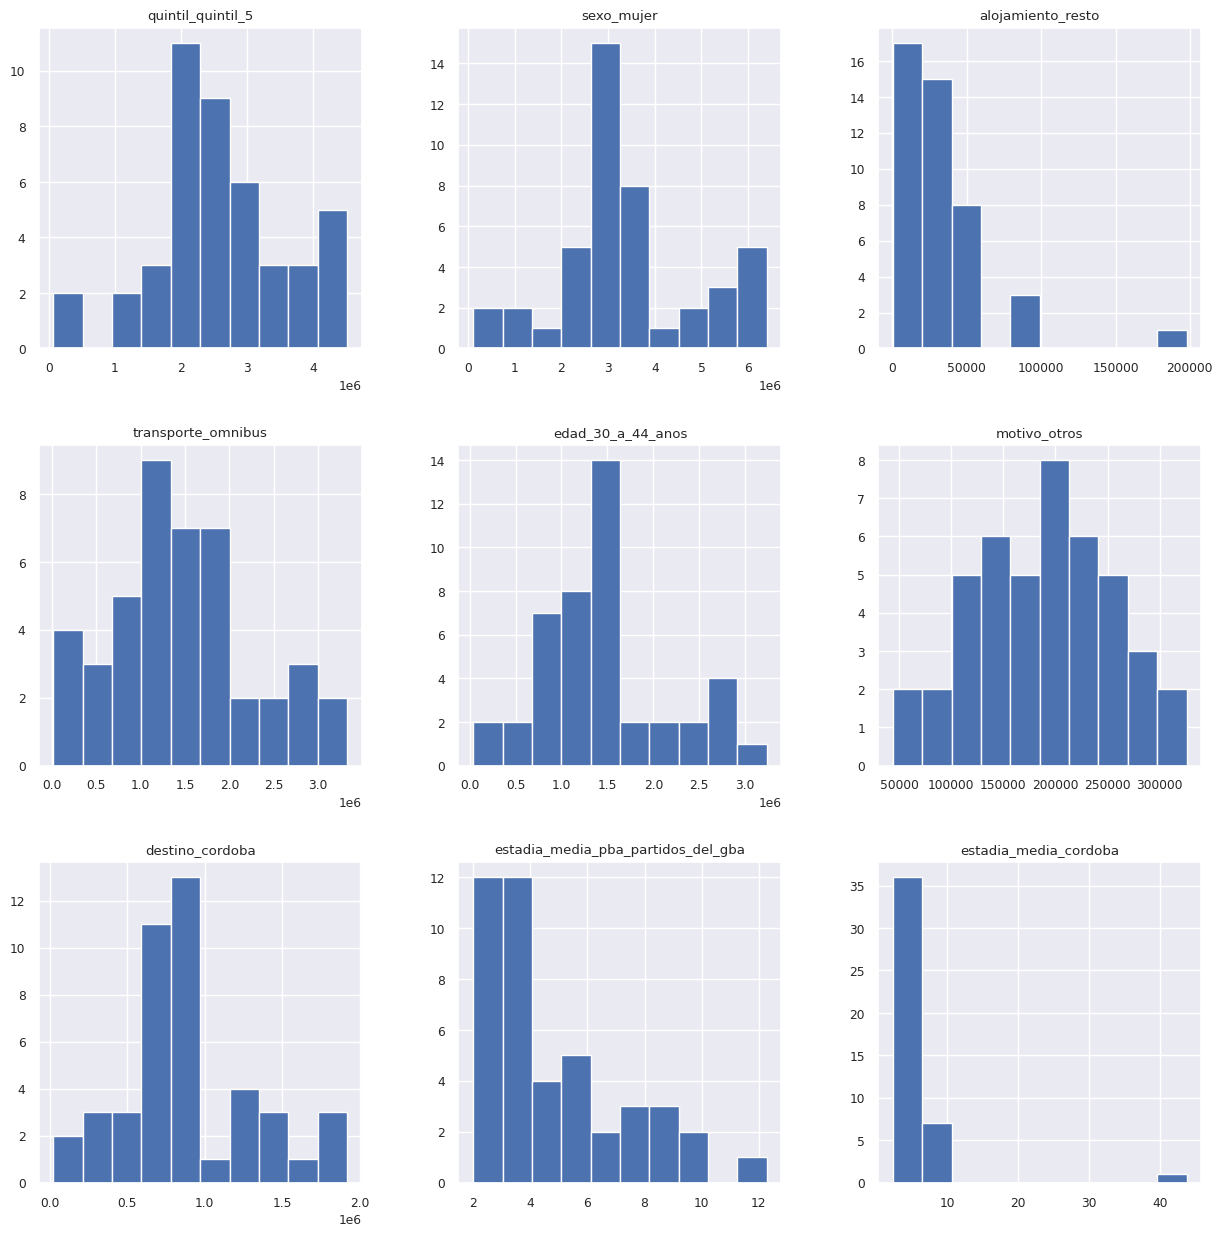

In [392]:
# Histograma de algunos feactures
df.iloc[:, [29, 30, 38, 40, 11, 18, 2, 61, 62]].hist(figsize =(15,15));

###**Boxplot**
Uso un boxplot para chequear rapidamente los outliers.
Creo un nuevo dataframe que solo contenga las estadias medias y cambio sus nombres para hacerlo más manejable. Los numeros y nombres de las columnas para hacer tal operación los obtuve con el método `info()`.

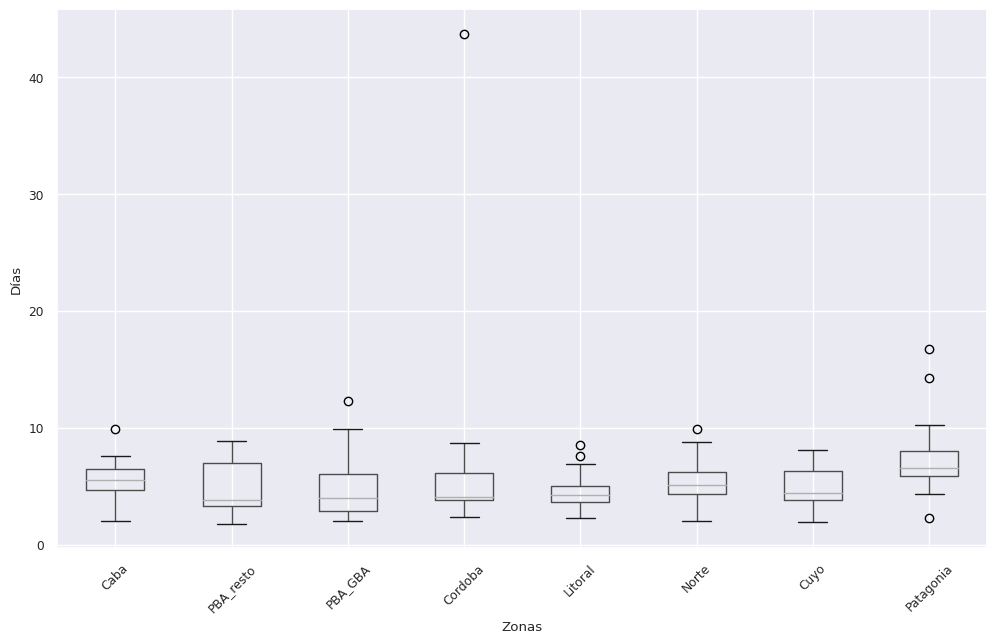

In [393]:
# Creo el nuevo dataframe usando iloc y los nros de columna.
estadias_medias = df.iloc[:, [59,60, 61,62,63,64,65,66]]

# Declaro un diccionario con los cambios a realizar
change_names = { 'estadia_media_caba' : 'Caba',
                 'estadia_media_pba_resto' : 'PBA_resto',
                 'estadia_media_pba_partidos_del_gba' : 'PBA_GBA',
                 'estadia_media_cordoba' : 'Cordoba',
                 'estadia_media_litoral' : 'Litoral',
                 'estadia_media_norte' : 'Norte',
                 'estadia_media_cuyo' : 'Cuyo',
                 'estadia_media_patagonia': 'Patagonia'
                  }

estadias_medias = estadias_medias.rename(columns=change_names)
plt.figure(figsize = (12, 7))
'''
plt.boxplot(df.iloc[:, [59,60, 61,62,63,64,65,66]])
También podría haber hecho el boxplot de esta forma, sin re-crear un dataframe nuevo.
'''
estadias_medias.boxplot()
plt.xlabel('Zonas')
plt.ylabel('Días')
plt.xticks(rotation=45)
plt.show()

##**6.-Modelo de regresión lineal**

Se tratará de relacionar las variables `'sexo_varon'`, con el `'destino_cordoba'`. Se verá más adelante en el estudio que, a mayor cantidad de viajantes masculinos, mayor cantidad viajarán a Córdoba.

In [394]:
x = df['sexo_varon'].values
y = df['destino_cordoba'].values


In [395]:
x

array([6075376, 2632352, 2812488, 2782068, 5703627, 2825608, 3235625,
       3269667, 5675764, 2726693, 3107485, 2759383, 5622227, 2334802,
       2694279, 2491205, 4710553, 1516583, 3122312, 2954026, 4943917,
       2232963, 4049084, 3304481, 5469068, 1963194, 2608623, 3111684,
       4699164, 2044108, 2908587, 3127665, 4139841,   67405,  355276,
       1339042, 2896594, 1152583, 2068074, 2693954, 6032798, 2723901,
       3206252, 3529034])

In [396]:
y

array([1918573,  743680,  596352, 1007641, 1893574,  882575,  788240,
        882733, 1743367,  803719,  676821,  617032, 1636476,  701578,
        801299,  863559, 1299888,  322509,  640269,  614088, 1445954,
        634095,  969728,  916685, 1488301,  573476,  787080,  821932,
       1350002,  432077,  851657,  908753, 1232281,   23827,   28002,
        343394,  906967,  247657,  417278,  671140, 1367246,  699919,
        744806, 1180999])

In [397]:
# Valores en forma de vector:
X = x.reshape((-1,1))
X

array([[6075376],
       [2632352],
       [2812488],
       [2782068],
       [5703627],
       [2825608],
       [3235625],
       [3269667],
       [5675764],
       [2726693],
       [3107485],
       [2759383],
       [5622227],
       [2334802],
       [2694279],
       [2491205],
       [4710553],
       [1516583],
       [3122312],
       [2954026],
       [4943917],
       [2232963],
       [4049084],
       [3304481],
       [5469068],
       [1963194],
       [2608623],
       [3111684],
       [4699164],
       [2044108],
       [2908587],
       [3127665],
       [4139841],
       [  67405],
       [ 355276],
       [1339042],
       [2896594],
       [1152583],
       [2068074],
       [2693954],
       [6032798],
       [2723901],
       [3206252],
       [3529034]])

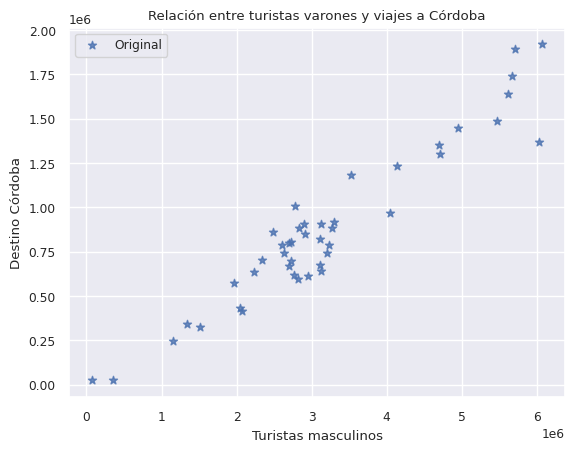

In [398]:
# Graficamos la relación
sns.regplot(x= X, y= y, fit_reg=False, label='Original',marker='*') #fit_reg = True
plt.xlabel('Turistas masculinos')
plt.ylabel('Destino Córdoba')
plt.title('Relación entre turistas varones y viajes a Córdoba')
plt.legend()
plt.show()

###**Método OLS**

Se continúa usando las columnas 'sexo_varon' y 'destino_cordoba'

In [399]:
ones = np.ones(shape=(len(X),1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [400]:
# Agregamos el vector x
X = np.append(ones, X, axis= 1)
X

array([[1.000000e+00, 6.075376e+06],
       [1.000000e+00, 2.632352e+06],
       [1.000000e+00, 2.812488e+06],
       [1.000000e+00, 2.782068e+06],
       [1.000000e+00, 5.703627e+06],
       [1.000000e+00, 2.825608e+06],
       [1.000000e+00, 3.235625e+06],
       [1.000000e+00, 3.269667e+06],
       [1.000000e+00, 5.675764e+06],
       [1.000000e+00, 2.726693e+06],
       [1.000000e+00, 3.107485e+06],
       [1.000000e+00, 2.759383e+06],
       [1.000000e+00, 5.622227e+06],
       [1.000000e+00, 2.334802e+06],
       [1.000000e+00, 2.694279e+06],
       [1.000000e+00, 2.491205e+06],
       [1.000000e+00, 4.710553e+06],
       [1.000000e+00, 1.516583e+06],
       [1.000000e+00, 3.122312e+06],
       [1.000000e+00, 2.954026e+06],
       [1.000000e+00, 4.943917e+06],
       [1.000000e+00, 2.232963e+06],
       [1.000000e+00, 4.049084e+06],
       [1.000000e+00, 3.304481e+06],
       [1.000000e+00, 5.469068e+06],
       [1.000000e+00, 1.963194e+06],
       [1.000000e+00, 2.608623e+06],
 

In [401]:
# Tamaño X
X.shape

(44, 2)

In [402]:
# El vector X traspuesto
X.T

array([[1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00],
       [6.075376e+06, 2.632352e+06, 2.812488e+06, 2.782068e+06,
        5.703627e+06, 2.825608e+06, 3.235625e+06, 3.269667e+06,
        5.675764e+06, 2.726693e+06, 3.107485e+06, 2.759383e+06,
        5.622227e+06, 2.334802e+06, 2.694279e+06, 2.491205e+06,
        4.710553e+06, 1.516583e+06, 3.1

In [403]:
# Utilizamos el metodo linalg para multiplicar los vectores:
X1 = np.linalg.inv(X.T @ X) # Calcular el inverso (multiplicativo) de una matriz
X1

array([[ 1.39614947e-01, -3.68098998e-08],
       [-3.68098998e-08,  1.15920582e-14]])

In [404]:
# Estimaciones de betha:
betha = X1 @ (X.T @ y)

In [405]:
# b0 y b1
betha.round(2)

array([-7.961014e+04,  3.000000e-01])

In [406]:
# Creamos nuestras predicciones
preds = X @ betha
preds

array([1745796.44965488,  711305.96036125,  765429.59667032,
        756289.60790338, 1634100.79928927,  769371.62995836,
        892565.27802724,  902793.53238636, 1625729.0863697 ,
        739651.64347309,  854064.35230088,  749473.67610923,
       1609643.36715156,  621904.13072274,  729912.53775673,
        668896.95331038, 1335721.92996835,  376062.16922048,
        858519.27056017,  807956.08352422, 1405838.44340059,
        591305.59962357, 1136977.05062317,  913253.74175297,
       1563625.23633118,  510250.84519657,  704176.34847924,
        855325.98322897, 1332299.99268805,  534562.25384511,
        794303.48820597,  860127.63216008, 1164245.8856173 ,
        -59357.64147313,   27136.03723589,  322718.22623324,
        790700.07317369,  266694.78226562,  541763.07471258,
        729814.88830409, 1733003.46997971,  738812.75955996,
        883739.87072772,  980722.90340922])

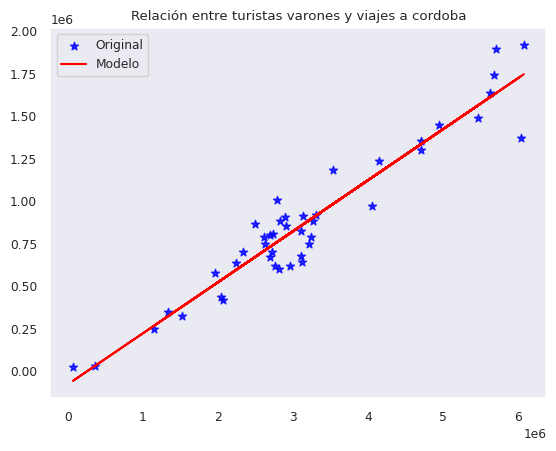

In [407]:
# Graficamos la relación
sns.regplot(x= x, y= y, fit_reg=False, label='Original',marker='*', color='blue') #fit_reg = True
plt.plot(x, preds, label = 'Modelo', color='red')
plt.grid()
plt.legend()
plt.title('Relación entre turistas varones y viajes a cordoba')
plt.show()

In [408]:
# Creamos la SSR, SSD, SST
y_mean = np.mean(y)
SSR = (preds - y_mean)**2
SSD = (y - preds)**2
SST = (y - y_mean)**2

In [409]:
SSR_sum = sum(SSR)
SSD_sum = sum(SSD)
SST_sum = sum(SST)

In [410]:
R2 = SSR_sum / SST_sum
R2.round(3)

0.915

El coeficiente de  determinacion nos da 0.915, que nos indica que el 91,5% de la variabilidad de Y (destino córdoba) se explica por la variabilidad de X, la población masculina.

In [411]:
R = np.sqrt(R2) # Vemos el coeficiente de correlación
R.round(3)

0.956

### **Regresión Lineal - Scikit Learn**

In [412]:
# Importamos el modelo Linear Regression:
from sklearn.linear_model import LinearRegression

In [413]:
# Instanciamos el modelo
model = LinearRegression()

In [414]:
# fiteamos el modelo:
model.fit(X,y)

LinearRegression()

In [415]:
# Solicitamos la predicción:
model.predict(X)

array([1745796.44965488,  711305.96036125,  765429.59667032,
        756289.60790338, 1634100.79928927,  769371.62995837,
        892565.27802725,  902793.53238636, 1625729.0863697 ,
        739651.64347309,  854064.35230088,  749473.67610923,
       1609643.36715156,  621904.13072274,  729912.53775673,
        668896.95331038, 1335721.92996835,  376062.16922048,
        858519.27056017,  807956.08352422, 1405838.44340059,
        591305.59962357, 1136977.05062317,  913253.74175297,
       1563625.23633118,  510250.84519658,  704176.34847924,
        855325.98322897, 1332299.99268805,  534562.25384511,
        794303.48820597,  860127.63216008, 1164245.8856173 ,
        -59357.64147313,   27136.03723589,  322718.22623325,
        790700.07317369,  266694.78226562,  541763.07471258,
        729814.88830409, 1733003.46997971,  738812.75955996,
        883739.87072773,  980722.90340922])

In [416]:
# Estimación de B1
print("b1: {:.3f}".format(model.coef_[1]))

b1: 0.300


In [417]:
# Estimación de B0
print("b0:  {:.3f}".format(model.intercept_))

b0:  -79610.138


In [418]:
from sklearn.metrics import r2_score

In [419]:
# Calculamos r2
print("R Squares:{:.3f}".format(r2_score(y,preds)))

R Squares:0.915


El coeficiente de  determinacion nos da 0.915, que nos indica que el 91,5% de la variabilidad de Y (destino córdoba) se explica por la variabilidad de X, la población masculina.

In [420]:
error = y - preds

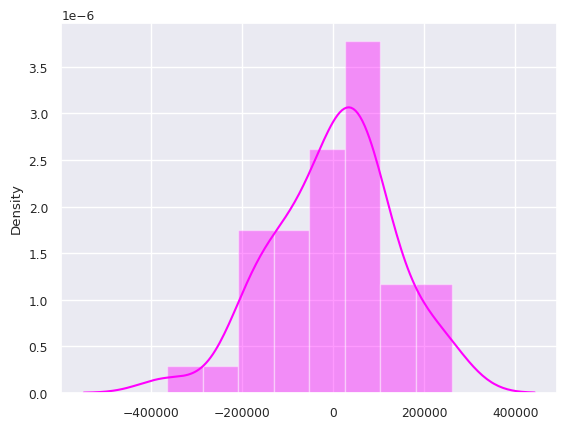

In [421]:
# Ploteamos la distribución de los errores para ver su comportamiento:
sns.distplot(error, color='Magenta');

##**7.-Distribución Normal**

In [422]:
from scipy import stats
# mu es la media, mientras que sigma es la desviación estándar. Entonces:
var = df['estadia_media_cordoba']
mu = var.mean()
sigma = var.std()
mu, sigma

(5.712045454545454, 6.061218919374511)

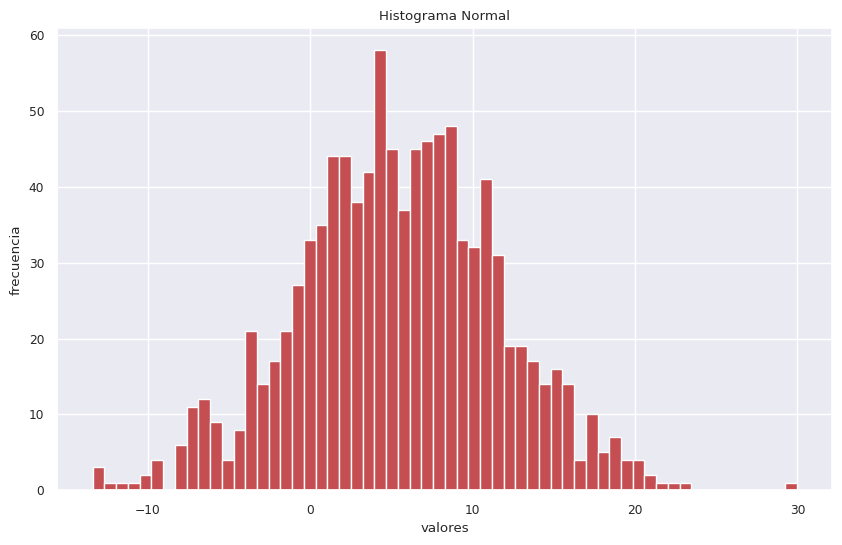

In [423]:
datos = np.random.normal(mu,sigma,1000)
plt.figure(figsize=(10,6))
plt.hist(datos,60, color="r", density = False)
plt.xlabel('valores')
plt.ylabel('frecuencia')
plt.title('Histograma Normal')
plt.show()

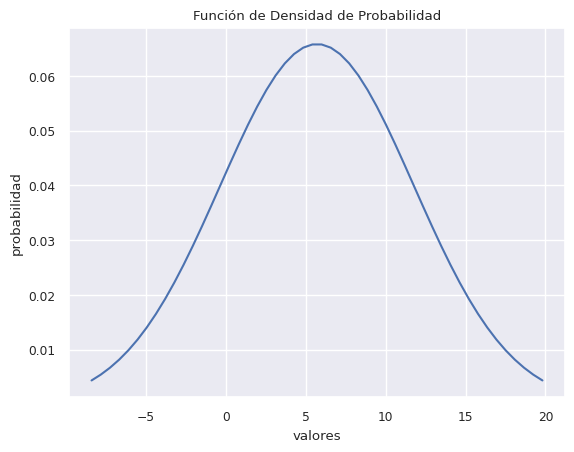

In [424]:
x_1= np.linspace(stats.norm(mu, sigma).ppf(0.01),stats.norm(mu, sigma).ppf(0.99))
FDP_normal = stats.norm(mu, sigma).pdf(x_1) # FDP
plt.plot(x_1, FDP_normal, label='FDP nomal')
plt.title('Función de Densidad de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

#**Modulo 3**
* Con la base de datos elegida en los módulos anteriores, aplicar alguna técnica de imputación para datos faltantes (realizado en ***Módulo 1 #3***), alguna técnica de discretizacion para variables categóricas.

* Intentar aplicar las técnicas de Normalización y Estandarización en al menos 2 variables.
* Implementar la técnica de PCA a la base seleccionada en el módulo I para intentar reducir la dimension de la base. Expresar alguna conclusión a lo encontrado. Se puede optar por implementar PCA a otra base diferente en donde sea aplicable la técnica del PCA.


## **8.-Discretización**
Se considera la discretización como parte de la Data reduction, donde se busca reducir la cantidad de instancias y features (variables).
Mediante la discretización los valores categóricos se pueden reemplazar por números con técnicas como One Hot Encoding o LabelEncoder.
En mi caso, el dataframe utilizado (df), y la versión resumida de estadias medias(`'estadias_medias'`) sólo tienen valores numéricos, por lo que agrego una nueva columna con datos categóricos aleatorios. Selecciono `'estadias_medias'` para hacer la operación:

In [425]:
# Primero verifico la cantidad de filas:
estadias_medias.shape[0]

44

In [426]:
# Agregamos una nueva columna llamada 'feriados_puente' con tres valores, que se asignaran a las instancias de forma aleatoria
estadias_medias['feriados_puente'] = np.random.choice(['típico', 'mayor', 'menor'], estadias_medias.shape[0])
estadias_medias.head()

,Caba,PBA_resto,PBA_GBA,Cordoba,Litoral,Norte,Cuyo,Patagonia,feriados_puente
0,5.57,8.41,7.18,7.26,5.05,8.01,7.05,9.05,típico
1,4.51,3.44,4.11,6.12,3.30,4.36,3.77,5.33,menor
2,6.21,3.09,6.31,4.33,4.49,5.38,4.37,5.89,menor
3,5.66,3.21,4.02,3.79,3.44,3.72,3.31,6.75,típico
4,5.77,8.71,7.80,7.23,6.84,9.88,7.70,8.28,menor


###***Discretización: One Hot Encoder utilizando get_dummies(pandas)***:



In [427]:
estadias_medias['feriados_puente'].value_counts()

típico    24
mayor     11
menor      9
Name: feriados_puente, dtype: int64

In [428]:
data1=pd.get_dummies(estadias_medias,columns=['feriados_puente'])
data1.head()

,Caba,PBA_resto,PBA_GBA,Cordoba,Litoral,Norte,Cuyo,Patagonia,feriados_puente_mayor,feriados_puente_menor,feriados_puente_típico
0,5.57,8.41,7.18,7.26,5.05,8.01,7.05,9.05,0,0,1
1,4.51,3.44,4.11,6.12,3.30,4.36,3.77,5.33,0,1,0
2,6.21,3.09,6.31,4.33,4.49,5.38,4.37,5.89,0,1,0
3,5.66,3.21,4.02,3.79,3.44,3.72,3.31,6.75,0,0,1
4,5.77,8.71,7.80,7.23,6.84,9.88,7.70,8.28,0,1,0


###***Discretización: One Hot Encoding de sklearn***:

In [429]:
from sklearn.preprocessing import OneHotEncoder
# Se crea la instancia OneHotEncoder()
enc = OneHotEncoder()
# Se aplica:
data2 = pd.DataFrame(enc.fit_transform(estadias_medias[['feriados_puente']]).toarray())
data2.head()

,0,1,2
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0


Uno ambos DataFrame: el original y el resultante de aplicar el OneHotEncoder. Voy a encontrarme con tres feactures más: '0', '1' y '2', que se corresponden a los valores de 'mayor', 'menor' y 'típico' de las instancias. La operación 'get_dummies' de pandas es similar: eliminó la variable con datos categóricos y agrego tres con variable numéricas, cuyos nombres contienen los nombres de los datos categóricos reemplazados ('feriados_puente_mayor', 'feriados_puente_menor', 'feriados_puente_típico').

In [430]:
data3 = estadias_medias.join(data2)
data3.head()

,Caba,PBA_resto,PBA_GBA,Cordoba,Litoral,Norte,Cuyo,Patagonia,feriados_puente,0,1,2
0,5.57,8.41,7.18,7.26,5.05,8.01,7.05,9.05,típico,0.0,0.0,1.0
1,4.51,3.44,4.11,6.12,3.30,4.36,3.77,5.33,menor,0.0,1.0,0.0
2,6.21,3.09,6.31,4.33,4.49,5.38,4.37,5.89,menor,0.0,1.0,0.0
3,5.66,3.21,4.02,3.79,3.44,3.72,3.31,6.75,típico,0.0,0.0,1.0
4,5.77,8.71,7.80,7.23,6.84,9.88,7.70,8.28,menor,0.0,1.0,0.0


## **9.-Estandarización**
La estandarización consiste en transformar la distribución de los valores de los atributos para que estos posean una media y desviación típica determinadas. Esta transformación se lleva a cabo para cada atributo de forma independiente.
En este caso, antes de estandarizar se eliminará la fecha:

In [431]:
df_2 = df.drop(['indice_tiempo'], axis=1)
df_2.head()

,destino_caba,destino_cordoba,destino_cuyo,destino_litoral,destino_norte,destino_patagonia,destino_pba_resto,destino_pba_partidos_del_gba,edad_menos_de_14_anos,edad_14_a_29_anos,...,gasto_medio_cuyo,gasto_medio_patagonia,estadia_media_caba,estadia_media_pba_resto,estadia_media_pba_partidos_del_gba,estadia_media_cordoba,estadia_media_litoral,estadia_media_norte,estadia_media_cuyo,estadia_media_patagonia
0,189534,1918573,838633,2049231,1331848,937769,5075668,132610,2700561,3143845,...,988.38524,1260.92633,5.57,8.41,7.18,7.26,5.05,8.01,7.05,9.05
1,275725,743680,362199,1502444,813177,263315,1402536,61388,957231,1296808,...,901.52479,1254.95557,4.51,3.44,4.11,6.12,3.30,4.36,3.77,5.33
2,360368,596352,475912,1107905,896399,444811,1501835,101282,1221911,1171650,...,1007.79172,1542.05071,6.21,3.09,6.31,4.33,4.49,5.38,4.37,5.89
3,189002,1007641,512563,1018847,979211,379846,1762021,98255,1172970,1295468,...,742.53016,1668.32983,5.66,3.21,4.02,3.79,3.44,3.72,3.31,6.75
4,165441,1893574,824501,1715615,1161820,707719,4632993,167877,2604040,2663484,...,1089.95163,1899.84317,5.77,8.71,7.80,7.23,6.84,9.88,7.70,8.28


###**Z Score**

Para estandarizar se utilizará el método z score. La estandarización consiste en transformar la distribución de los valores de los atributos para que
estos posean una media y desviación típica determinadas. Esta transformación se lleva a cabo para cada atributo de forma independiente.
Su fórmula:


  \\begin{align}
        z = \frac{x - \mu}{\sigma}
    \end{align}
Donde:

 * **μ** es la media de 𝑿.
 * **σ** es la desviación estándar.
 * **𝒁** es el z score.

Un z-score es el número de desviaciones estándar de la media de un punto de información.
El código no hace más que ejecutar la fórmula, iterando todas instancias y haciendo el cálculo.

In [432]:
# Convertir a z score:
datos_z=pd.DataFrame()
for j in df_2.columns[0:]:
  datos_z[j] = (df_2[j] - df_2[j].mean()) / df_2[j].std()

datos_z.head()

,destino_caba,destino_cordoba,destino_cuyo,destino_litoral,destino_norte,destino_patagonia,destino_pba_resto,destino_pba_partidos_del_gba,edad_menos_de_14_anos,edad_14_a_29_anos,...,gasto_medio_cuyo,gasto_medio_patagonia,estadia_media_caba,estadia_media_pba_resto,estadia_media_pba_partidos_del_gba,estadia_media_cordoba,estadia_media_litoral,estadia_media_norte,estadia_media_cuyo,estadia_media_patagonia
0,-0.191362,2.346525,1.656063,2.080861,1.873908,1.576278,1.837315,-0.042303,1.853377,2.478821,...,-0.657198,-0.689427,0.015954,1.762840,0.920696,0.255387,0.449423,1.629701,1.392049,0.799448
1,0.705775,-0.293970,-0.588670,0.793078,0.071160,-0.901265,-0.639549,-0.545573,-0.572211,-0.139689,...,-0.670980,-0.689877,-0.686011,-0.631854,-0.296804,0.067306,-0.859905,-0.678323,-0.681442,-0.709996
2,1.586798,-0.625080,-0.052907,-0.136133,0.360415,-0.234557,-0.572590,-0.263673,-0.203948,-0.317123,...,-0.654118,-0.668283,0.439781,-0.800495,0.575671,-0.228014,0.030438,-0.033341,-0.302145,-0.482767
3,-0.196899,0.299265,0.119775,-0.345881,0.648245,-0.473199,-0.397141,-0.285063,-0.272042,-0.141588,...,-0.696208,-0.658785,0.075555,-0.742675,-0.332496,-0.317105,-0.755159,-1.083018,-0.972236,-0.133810
4,-0.442138,2.290341,1.589480,1.295135,1.282941,0.731211,1.538810,0.206902,1.719082,1.797823,...,-0.641082,-0.641372,0.148400,1.907389,1.166575,0.250437,1.788678,2.812168,1.802954,0.487010


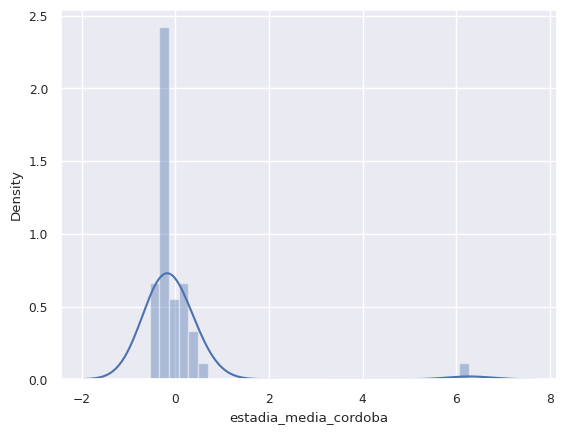

In [433]:
# Graficamos la distribución de la variable estadia_media_cordoba:
sns.distplot(datos_z['estadia_media_cordoba'], kde=True) #False
plt.show()

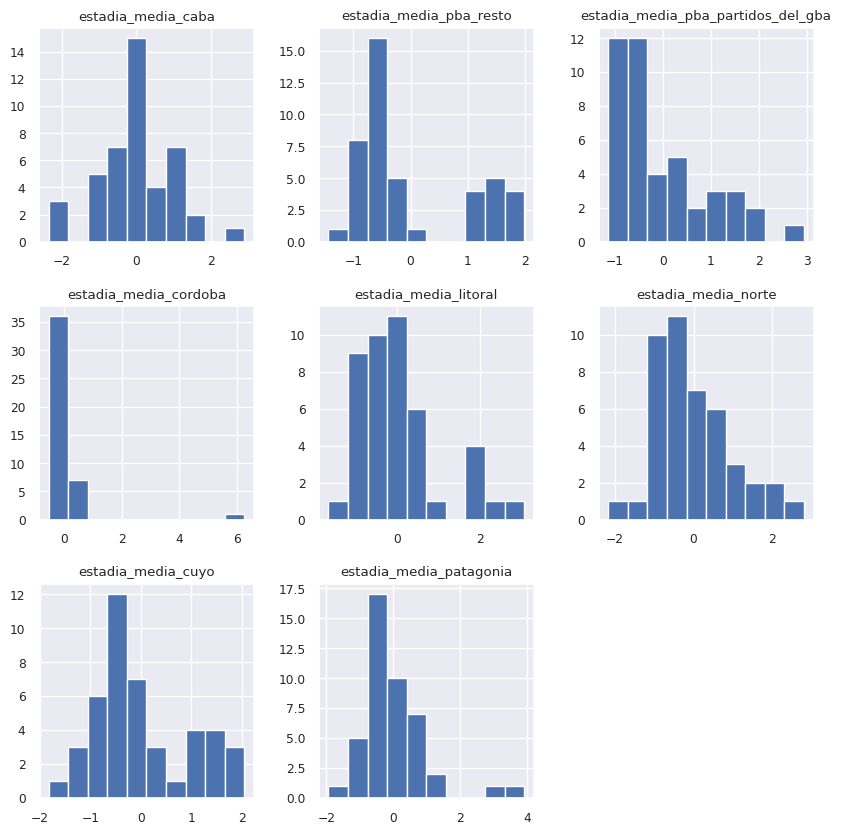

In [434]:
# Muestro algunos histograma de los valores de las variables luego de operar calcular z score
datos_z.iloc[:,[58,59,60,61,62,63,64,65]].hist(figsize =(10, 10));


¿Para qué sirve z-score y por qué es conveniente estandarizar? Z-score auda a identificar outliers en el dataset. Es decir, datos que queden más allá de cierto límite, digamos z > 3 or z < -3 (siendo z la desviación estándar) son considerados outliers, ya que se considera que cerca del 99.7% de los datos entran en el rango de 3 desviaciones estandar de la media.

La estandarización transformará la escala con la que son medidos los datos, independientemente de su magnitud, en base a la media y a la desviación estándar. De esta forma es más sencilla la comparación y el análisis de las variables.


Graficamos las estadias medias del z_score:

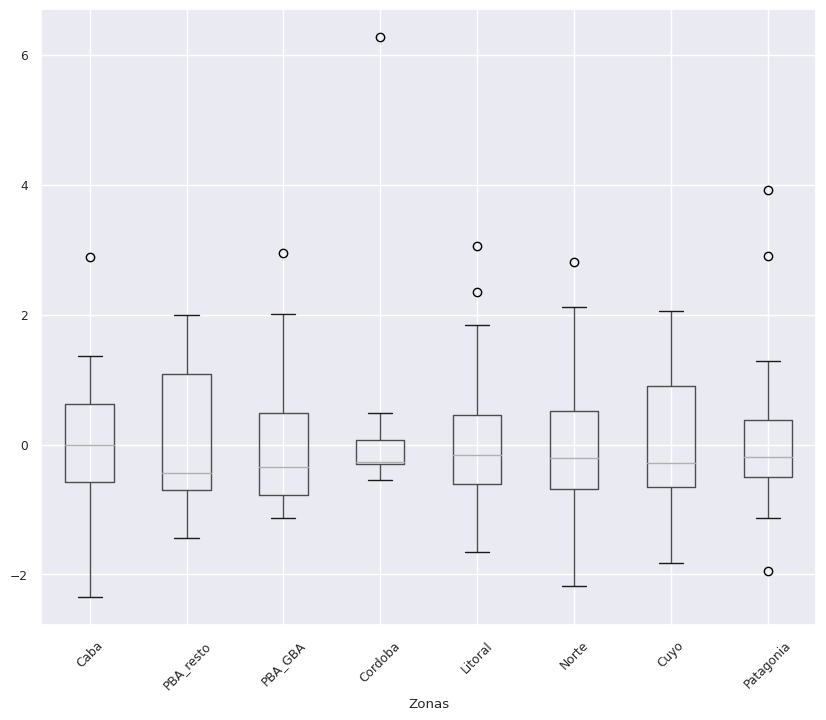

In [435]:
# Creo el nuevo dataframe usando iloc y los nros de columna.
estadias_medias_z = datos_z.iloc[:, [58,59,60, 61,62,63,64,65]]

# Declaro un diccionario con los cambios a realizar
change_names = { 'estadia_media_caba' : 'Caba',
                 'estadia_media_pba_resto' : 'PBA_resto',
                 'estadia_media_pba_partidos_del_gba' : 'PBA_GBA',
                 'estadia_media_cordoba' : 'Cordoba',
                 'estadia_media_litoral' : 'Litoral',
                 'estadia_media_norte' : 'Norte',
                 'estadia_media_cuyo' : 'Cuyo',
                 'estadia_media_patagonia': 'Patagonia'
                  }

estadias_medias_z = estadias_medias_z.rename(columns=change_names)
plt.figure(figsize = (10, 8))
estadias_medias_z.boxplot()
plt.xlabel('Zonas')
plt.xticks(rotation=45)
plt.show()

El boxplot se explica de la siguiente forma: la longitud de la caja está dada por el rango intercuantílico IQR, que surge de la diferencia entre el tercer y el primer cuartil: 𝙌3 - 𝙌1, donde estarían ubicados el 50% de los datos. La línea central es a mediana, ubicada en el cuartil 𝙌2. Los extremos se reconocen por un valor mínimo que resulta de hacer
𝙌1 - 1,5 . IQR, y un máximo dado por 𝙌3 + 1,5 . IQR.

En estos datos ya normalizados podemos notar cómo identificar los outliers: los datos que están más allá del mínimo y del máximo del boxplot.

####**Standard Scaler**

In [436]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
stz = sc.fit_transform(df_2)

In [437]:
stz

array([[-0.19357393,  2.37365346,  1.67520923, ...,  1.6485417 ,
         1.40814265,  0.80869068],
       [ 0.7139342 , -0.29736862, -0.59547534, ..., -0.68616551,
        -0.68931991, -0.71820389],
       [ 1.60514338, -0.63230664, -0.05351915, ..., -0.03372678,
        -0.30563773, -0.48834879],
       ...,
       [-0.28948292, -0.39685563, -0.10952442, ..., -1.12112466,
        -1.18171203, -0.8823861 ],
       [ 0.33688942, -0.29480875,  0.34308356, ..., -0.2448099 ,
        -0.56142585, -0.44319868],
       [ 2.05847102,  0.69683997, -0.04988746, ..., -0.46228947,
        -0.97068683, -1.14097308]])

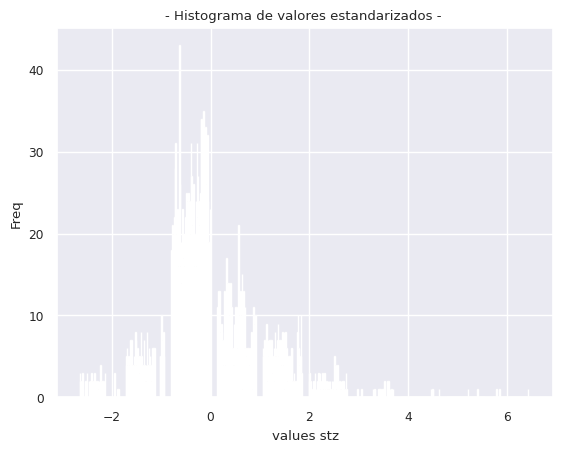

In [456]:
plt.hist(x=stz, rwidth=0.85 )
plt.title('- Histograma de valores estandarizados - ')
plt.xlabel('values stz')
plt.ylabel('Freq')
plt.show() #dibujamos el histograma

#### **MinMaxScaler**

In [439]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mmax = mms.fit_transform(df_2)
mmax

array([[0.45035887, 1.        , 0.9554006 , ..., 0.76269036, 0.83034258,
        0.46745152],
       [0.67184814, 0.37992058, 0.40517343, ..., 0.29949239, 0.29526917,
        0.2098338 ],
       [0.88935944, 0.30216451, 0.53649903, ..., 0.42893401, 0.39314845,
        0.24861496],
       ...,
       [0.42695102, 0.35682461, 0.52292796, ..., 0.21319797, 0.16965742,
        0.18213296],
       [0.57982541, 0.38051486, 0.63260291, ..., 0.38705584, 0.3278956 ,
        0.25623269],
       [1.        , 0.61072671, 0.53737905, ..., 0.34390863, 0.22349103,
        0.13850416]])

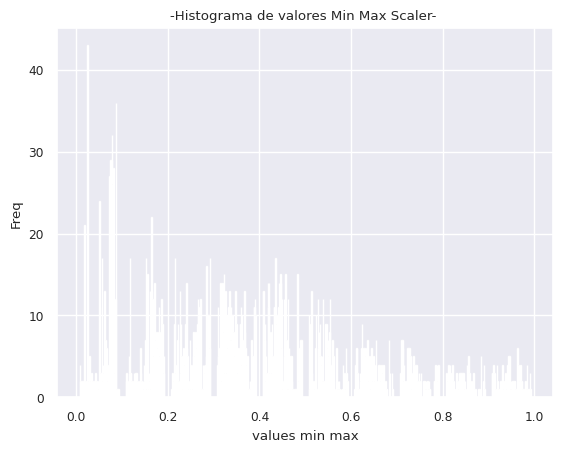

In [440]:
plt.hist(x=mmax, rwidth=0.85)
plt.title('-Histograma de valores Min Max Scaler- ')
plt.xlabel('values min max')
plt.ylabel('Freq')
plt.show() #dibujamos el histograma

# **Análisis de componentes principales**

Ya tenemos los datos estandarizados en la variable *`mmax`* realizado en el punto anterior. Ploteamos la estandarización:

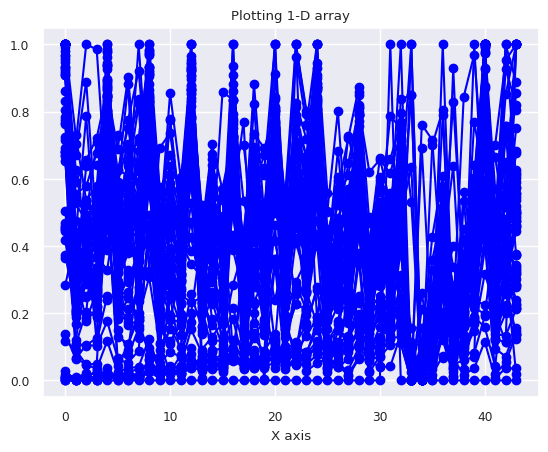

In [441]:
# Ploteamos la estandarización
plt.title("Plotting 1-D array")
plt.xlabel("X axis")
# plt.ylabel("Y axis")
plt.plot(mmax, color = "blue", marker = "o")
#plt.legend()
plt.show()

In [442]:
#Aplicación de PCA
from sklearn.decomposition import PCA

In [443]:
# Veamos el tamaño del dataset
mmax.shape

(44, 66)

In [444]:
# Instanciamos:
pca = PCA()
X_pca = pca.fit_transform(mmax)

In [445]:
#Análisis de la varianza explicada para cada componente:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.87962973e-01, 1.31494507e-01, 8.91590181e-02, 2.31887953e-02,
       2.17116379e-02, 2.00729039e-02, 1.73626180e-02, 1.32495066e-02,
       1.24525827e-02, 1.15269880e-02, 1.02999076e-02, 6.86643268e-03,
       6.33328782e-03, 6.11235494e-03, 5.56180899e-03, 5.03637194e-03,
       4.16868336e-03, 3.69770337e-03, 3.28128564e-03, 2.92731893e-03,
       2.59666707e-03, 2.28709205e-03, 1.93546705e-03, 1.63153161e-03,
       1.31777487e-03, 1.25588048e-03, 1.12073124e-03, 9.16792766e-04,
       8.39991753e-04, 7.54119814e-04, 5.19574212e-04, 4.72498670e-04,
       3.94337115e-04, 3.20737849e-04, 2.79045134e-04, 2.39501796e-04,
       1.86162037e-04, 1.44022439e-04, 1.10060961e-04, 8.03507174e-05,
       5.39148524e-05, 4.19138658e-05, 3.51460498e-05, 1.15955251e-31])

De éste análisis podemos decir, que, una vez que descomponemos el dataframe en sus componentes vectoriales, obtenemos que de esos 44 componentes, los primeros 15 explican el 95,1% de información contenida.
Probemos reducir los componentes de 44 a 15:

In [446]:
pca = PCA(n_components=15)
Redux_pca = pca.fit_transform(mmax)
#Análisis de la varianza explicada para cada componente:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.58796297, 0.13149451, 0.08915902, 0.0231888 , 0.02171164,
       0.0200729 , 0.01736262, 0.01324951, 0.01245258, 0.01152699,
       0.01029991, 0.00686643, 0.00633329, 0.00611235, 0.00556181])

Ahora para recuperar los datos se tienen que aplicar las transformaciones inversas en el orden correcto, primero el PCA y en segundo lugar la normalización:

In [447]:
new_data = mms.inverse_transform(pca.inverse_transform(Redux_pca))
new_data

array([[1.75611177e+05, 1.98154676e+06, 8.75013498e+05, ...,
        8.34616453e+00, 6.86101724e+00, 9.04938209e+00],
       [2.56588245e+05, 7.28947701e+05, 3.58817649e+05, ...,
        4.52653213e+00, 3.54484276e+00, 5.47323190e+00],
       [3.49506310e+05, 6.93791875e+05, 4.76400478e+05, ...,
        5.49335333e+00, 4.23060927e+00, 6.55635688e+00],
       ...,
       [1.75730346e+05, 7.26738301e+05, 4.31183939e+05, ...,
        3.58342430e+00, 2.97895815e+00, 4.86032977e+00],
       [2.42936270e+05, 7.65908121e+05, 5.51711072e+05, ...,
        5.44244769e+00, 4.23057120e+00, 7.00252150e+00],
       [4.00044216e+05, 1.13630114e+06, 4.81130877e+05, ...,
        5.15526005e+00, 3.20641979e+00, 4.02417467e+00]])

Creamos un DataFrame para comprobar las diferencias entre los dos conjuntos de datos:

In [448]:
# Vemos como df:
df_recompuesto = pd.DataFrame(new_data,columns=df_2.columns)
df_recompuesto.head()

,destino_caba,destino_cordoba,destino_cuyo,destino_litoral,destino_norte,destino_patagonia,destino_pba_resto,destino_pba_partidos_del_gba,edad_menos_de_14_anos,edad_14_a_29_anos,...,gasto_medio_cuyo,gasto_medio_patagonia,estadia_media_caba,estadia_media_pba_resto,estadia_media_pba_partidos_del_gba,estadia_media_cordoba,estadia_media_litoral,estadia_media_norte,estadia_media_cuyo,estadia_media_patagonia
0,175611.176707,1.981547e+06,875013.497692,1.981195e+06,1.286822e+06,813227.442443,5.311636e+06,154410.123581,2.795627e+06,3.051937e+06,...,1393.797316,3615.060279,5.405683,8.190279,7.005804,7.288767,5.824013,8.346165,6.861017,9.049382
1,256588.245264,7.289477e+05,358817.648742,1.191555e+06,8.106659e+05,340865.522136,1.734971e+06,66190.300440,9.868108e+05,1.263913e+06,...,234.812129,1426.761928,4.822553,3.317691,4.424513,4.648992,3.352940,4.526532,3.544843,5.473232
2,349506.309739,6.937919e+05,476400.477564,1.199338e+06,9.283027e+05,400591.498420,1.334846e+06,108897.875300,1.031012e+06,1.273502e+06,...,1569.415023,1467.940463,6.560264,3.236430,6.619816,8.269285,4.302044,5.493353,4.230609,6.556357
3,226188.724836,8.782264e+05,536401.148892,1.194840e+06,9.461958e+05,391127.582162,1.729285e+06,60595.243074,1.132805e+06,1.433300e+06,...,689.174907,4195.406626,4.946732,3.123500,3.962779,4.982549,2.757351,3.747719,3.492965,6.667417
4,188260.749551,1.839847e+06,812048.591530,1.751649e+06,1.193505e+06,738932.779975,4.663750e+06,165672.687574,2.591766e+06,2.744763e+06,...,1121.096917,1832.681121,5.364888,8.933972,8.595127,9.528711,6.743378,9.193719,7.654456,8.927224


In [449]:
# el original
df_2.head()

,destino_caba,destino_cordoba,destino_cuyo,destino_litoral,destino_norte,destino_patagonia,destino_pba_resto,destino_pba_partidos_del_gba,edad_menos_de_14_anos,edad_14_a_29_anos,...,gasto_medio_cuyo,gasto_medio_patagonia,estadia_media_caba,estadia_media_pba_resto,estadia_media_pba_partidos_del_gba,estadia_media_cordoba,estadia_media_litoral,estadia_media_norte,estadia_media_cuyo,estadia_media_patagonia
0,189534,1918573,838633,2049231,1331848,937769,5075668,132610,2700561,3143845,...,988.38524,1260.92633,5.57,8.41,7.18,7.26,5.05,8.01,7.05,9.05
1,275725,743680,362199,1502444,813177,263315,1402536,61388,957231,1296808,...,901.52479,1254.95557,4.51,3.44,4.11,6.12,3.30,4.36,3.77,5.33
2,360368,596352,475912,1107905,896399,444811,1501835,101282,1221911,1171650,...,1007.79172,1542.05071,6.21,3.09,6.31,4.33,4.49,5.38,4.37,5.89
3,189002,1007641,512563,1018847,979211,379846,1762021,98255,1172970,1295468,...,742.53016,1668.32983,5.66,3.21,4.02,3.79,3.44,3.72,3.31,6.75
4,165441,1893574,824501,1715615,1161820,707719,4632993,167877,2604040,2663484,...,1089.95163,1899.84317,5.77,8.71,7.80,7.23,6.84,9.88,7.70,8.28


Hay diferencias entre los dos DataFrames; podemos medir cual es el error cuadrático medio entre los dos conjuntos de datos

In [450]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df_2, df_recompuesto)

66465194551.858734

El error cuadrático medio del dataframe es elevado.
Podríamos obtener el error cuadrático medio para las columnas 'destino_caba', 'destino_cordoba' y 'estadia_media_patagonia'.

In [451]:
print('Error cuadrático medio:')
print('Para "destino_caba" es', mean_squared_error(df_2['destino_caba'], df_recompuesto['destino_caba']))
print('Para "destino_cordoba" es', mean_squared_error(df_2['destino_cordoba'], df_recompuesto['destino_cordoba']))
print('Para "estadia_media_patagonia" es', mean_squared_error(df_2['estadia_media_patagonia'], df_recompuesto['estadia_media_patagonia']))

Error cuadrático medio:
Para "destino_caba" es 317494790.671145
Para "destino_cordoba" es 4849846981.790002
Para "estadia_media_patagonia" es 0.37845298618357837


Comparando los dataframes a simple vista vemos diferencias muy marcadas, pero hay otras donde los errores no fueron tan groseros. Esto se evidencia en "estadia_media_patagonia" donde el resultado está cerca de 0.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.58796297 0.13149451 0.08915902 0.0231888  0.02171164 0.0200729
 0.01736262 0.01324951 0.01245258 0.01152699 0.01029991 0.00686643
 0.00633329 0.00611235 0.00556181]



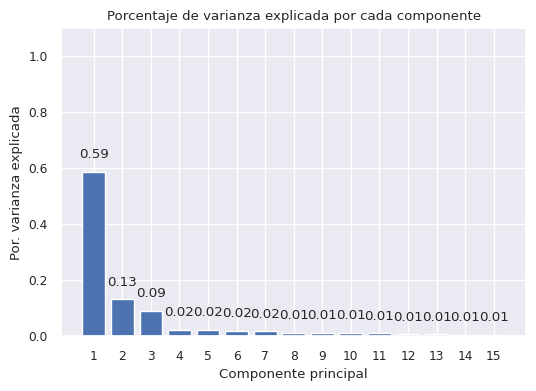

In [452]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(pca.explained_variance_ratio_)
print('')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(pca.n_components_) + 1,
    height = pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df_2.columns)) + 1, pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');